In [73]:
import warnings
warnings.filterwarnings('ignore')

# Data understanding and exploration

In [74]:
import pandas as pd
import numpy as np

In [75]:
dataset = pd.read_csv('BoomBikes.csv')

In [76]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [77]:
 dataset.shape

(730, 16)

In [78]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [79]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [81]:
# assigning string values to seasons instead of numerical values

# 1. spring
dataset.loc[(dataset['season'] == 1), 'season'] = 'spring'

# 2. summer
dataset.loc[(dataset['season'] == 2), 'season'] = 'summer'
             
# 3. fall 
dataset.loc[(dataset['season'] == 3), 'season'] = 'fall'
             
# 4. winter
dataset.loc[(dataset['season'] == 4), 'season'] = 'winter'
                          

In [82]:
dataset['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [83]:
dataset['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [84]:
def obj_map_months(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [85]:
dataset[['mnth']] = dataset[['mnth']].apply(obj_map_months)

In [86]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [87]:
dataset['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [88]:
def obj_map_week(x):
    return x.map({1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat', 7: 'Sun'})

In [89]:
dataset[['weekday']] = dataset[['weekday']].apply(obj_map_week)

In [90]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [91]:
dataset['workingday'].astype('category').value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [92]:
# 1. clear, few clouds, partially cloudy
dataset.loc[(dataset['weathersit'] == 1), 'weathersit'] = 'A'

# 2. misty, cloudy
dataset.loc[(dataset['weathersit'] == 2), 'weathersit'] = 'B'
             
# 3. light snow, heavy rainfall 
dataset.loc[(dataset['weathersit'] == 3), 'weathersit'] = 'C'

In [93]:
dataset['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

# Data visualisation

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='temp', ylabel='Density'>

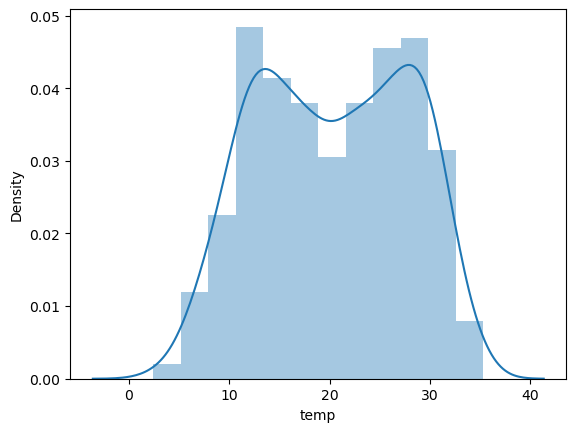

In [95]:
# temperature
sns.distplot(dataset['temp'])

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

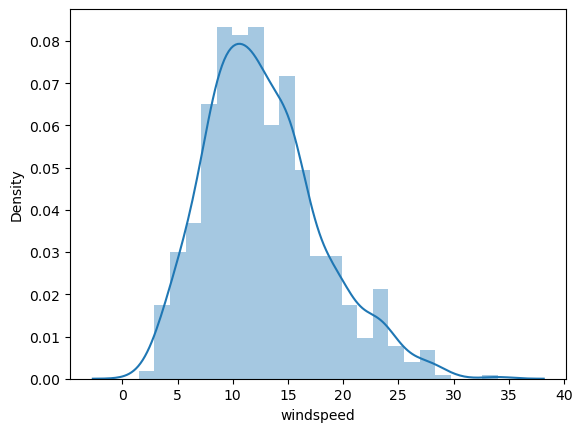

In [96]:
# wind speed
sns.distplot(dataset['windspeed'])

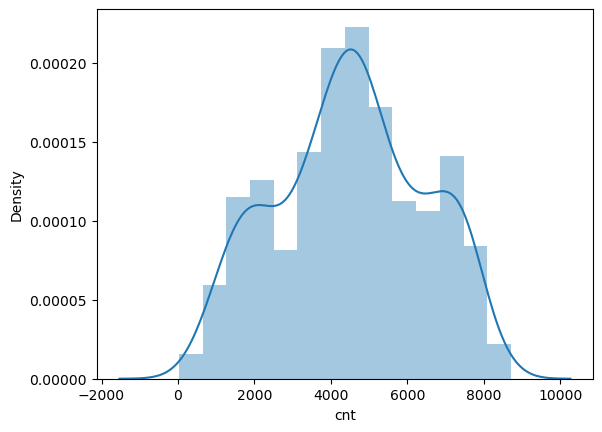

In [97]:
# target variable: count of total rental bikes both casual and registered
sns.distplot(dataset['cnt'])
plt.show()

In [98]:
dataset['dteday'] = dataset['dteday'].astype('datetime64')

In [99]:
dataset_categorical = dataset.select_dtypes(exclude=['float64','datetime64','int64'])

In [100]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [101]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Fri,B
726,spring,Dec,Sat,B
727,spring,Dec,NaN,B
728,spring,Dec,Mon,A


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

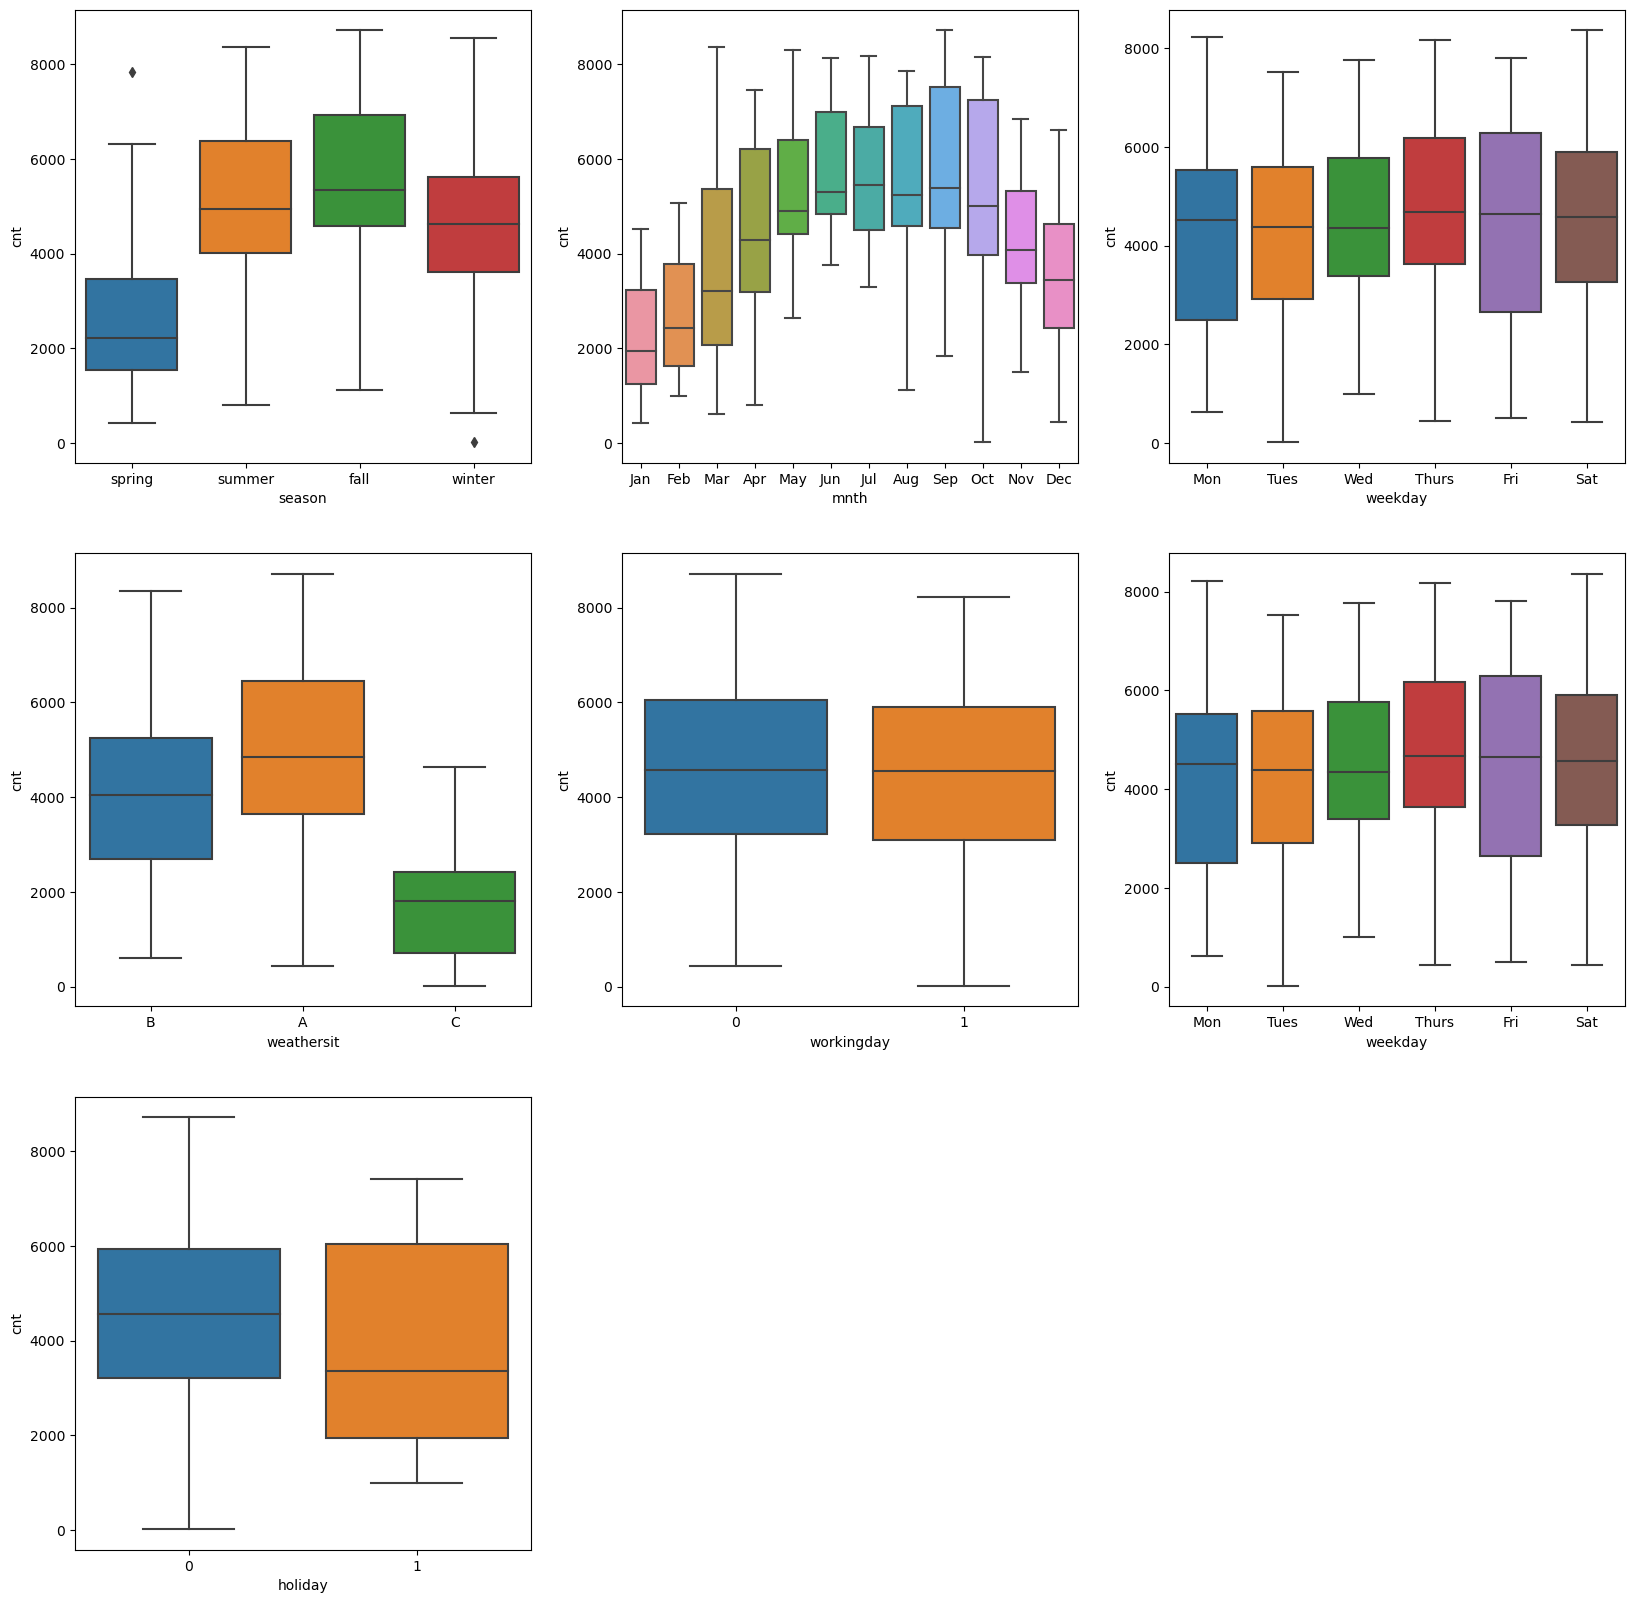

In [102]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = dataset)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = dataset)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataset)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataset)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = dataset)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataset)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = dataset)

In [103]:
inVarList = ['casual', 'registered', 'cnt']

for var in inVarList:
    dataset[var] = dataset[var].astype('float')

In [104]:
dataset_numeric = dataset.select_dtypes(include = 'float64')
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


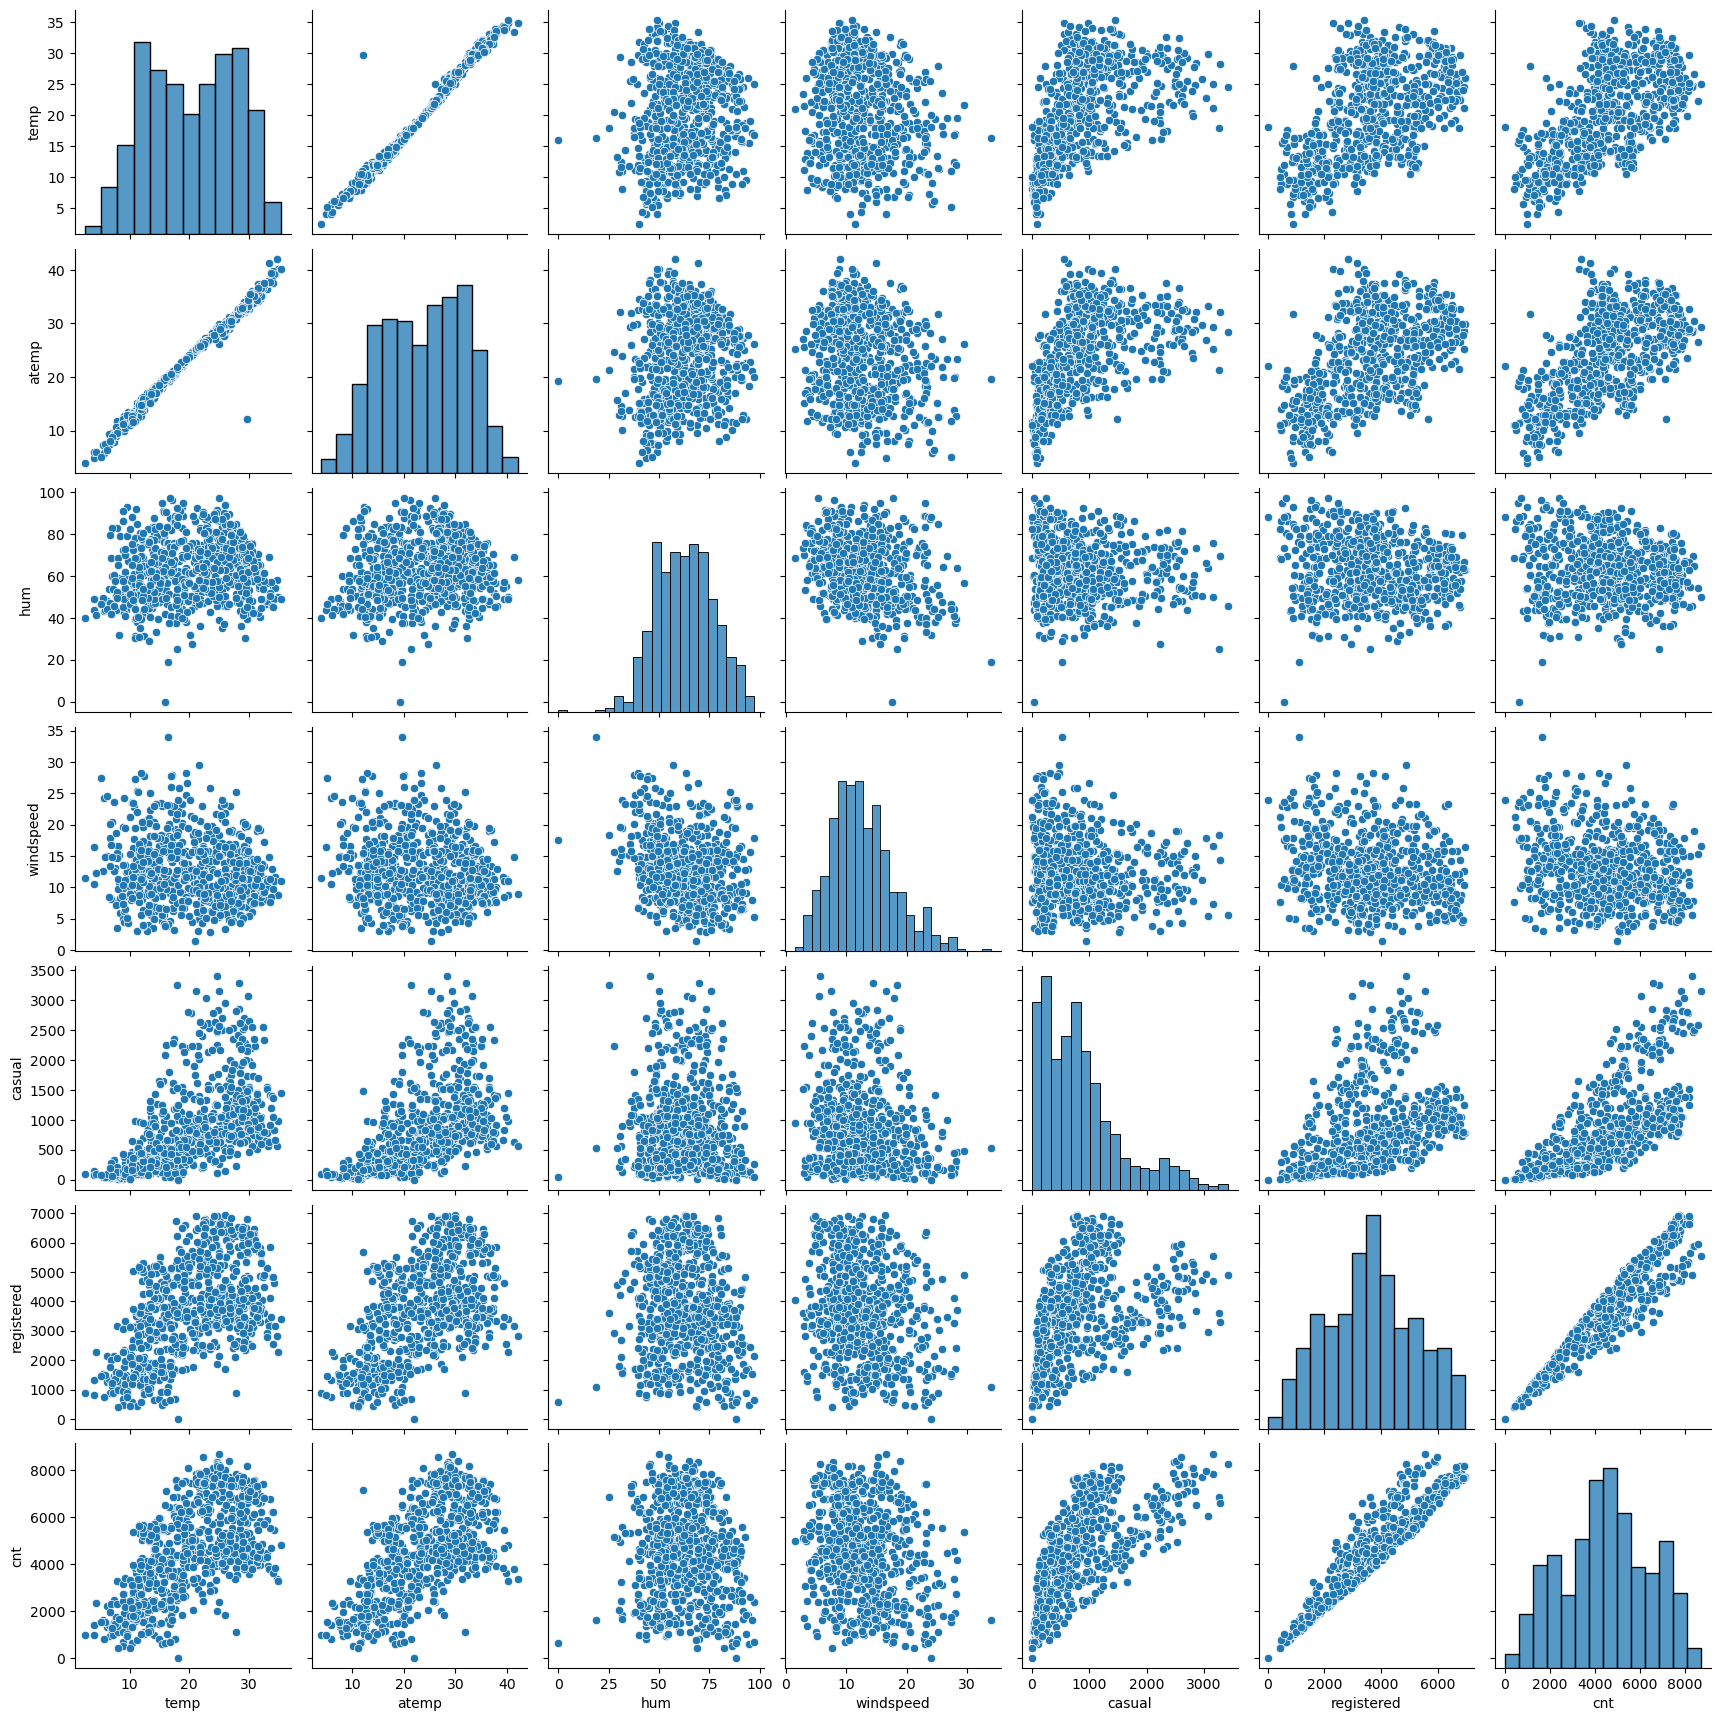

In [105]:
sns.pairplot(dataset_numeric)

In [106]:
corr_matrix = dataset_numeric.corr()
corr_matrix

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<AxesSubplot:>

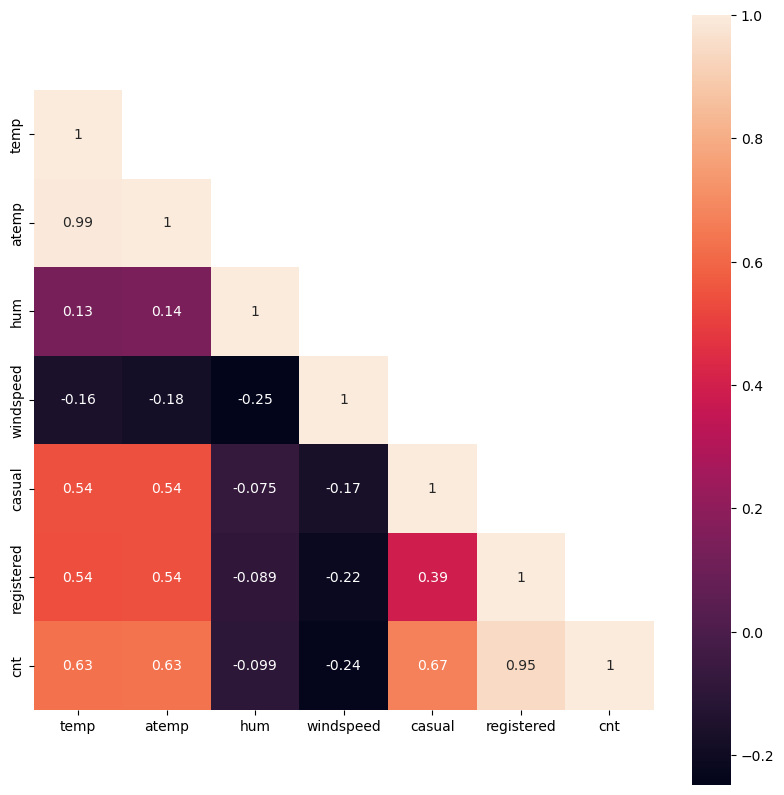

In [107]:
# heatmap
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False 
fig, ax = plt.subplots()
fig.set_size_inches(10 ,10)
sns.heatmap(corr_matrix, mask = mask, vmax = 1, square = True, annot = True)

In [108]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,B,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Tues,1,B,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Wed,1,A,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Thurs,1,A,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Fri,1,A,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


# Data preparation

In [109]:
dataset_categorical = dataset.select_dtypes(include = ['object'])

In [110]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A


In [111]:
dataset_dummies = pd.get_dummies(dataset_categorical, drop_first = True)

In [112]:
dataset_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# drop categorical data columns
dataset = dataset.drop(list(dataset_categorical), axis=1)
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [114]:
# concatenate dummy to dataset
dataset = pd.concat([dataset, dataset_dummies], axis=1)
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331.0,...,0,0,0,1,0,0,0,0,1,0
1,2,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,131.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82.0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
dataset = dataset.drop(['instant', 'dteday'], axis = 1, inplace = False)

In [116]:
dataset.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0,...,0,0,0,0,0,0,0,0,0,0


# Building model

In [117]:
# import libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [118]:
# train-test split
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state=100)

In [119]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,23.04230,55.8333,12.208807,922.0,6612.0,7534.0,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.14480,70.4167,11.083475,968.0,6248.0,7216.0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,956.0,3110.0,4066.0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,364.0,1432.0,1796.0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,1120.0,3100.0,4220.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,32.98605,58.7917,13.916771,1017.0,5647.0,6664.0,...,0,0,0,0,0,0,1,0,1,0
578,1,0,1,30.852500,35.35440,65.9583,8.666718,983.0,6278.0,7261.0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,139.0,1778.0,1917.0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,1,10.591653,12.46855,56.0833,16.292189,275.0,2464.0,2739.0,...,0,0,0,1,0,0,0,0,1,0


In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [121]:
var = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df_train[var] = scaler.fit_transform(df_train[var])

In [122]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,23.04230,0.575354,0.300794,0.280402,0.951776,0.864243,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,33.14480,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,20.67460,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,11.58500,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,18.87520,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,32.98605,0.605840,0.355596,0.309357,0.812446,0.764151,...,0,0,0,0,0,0,1,0,1,0
578,1,0,1,0.863973,35.35440,0.679690,0.187140,0.298994,0.903552,0.832835,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,12.28585,0.435939,0.111379,0.041756,0.253826,0.218017,...,0,0,0,0,0,0,0,0,0,0
350,0,0,1,0.248216,12.46855,0.577930,0.431816,0.083206,0.352873,0.312586,...,0,0,0,1,0,0,0,0,1,0


In [123]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,23.493909,0.650369,0.320768,0.254661,0.523944,0.513620,...,0.086275,0.086275,0.080392,0.154902,0.129412,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,8.090038,0.145882,0.169797,0.206011,0.228175,0.224593,...,0.281045,0.281045,0.272166,0.362166,0.335985,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,24.020400,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


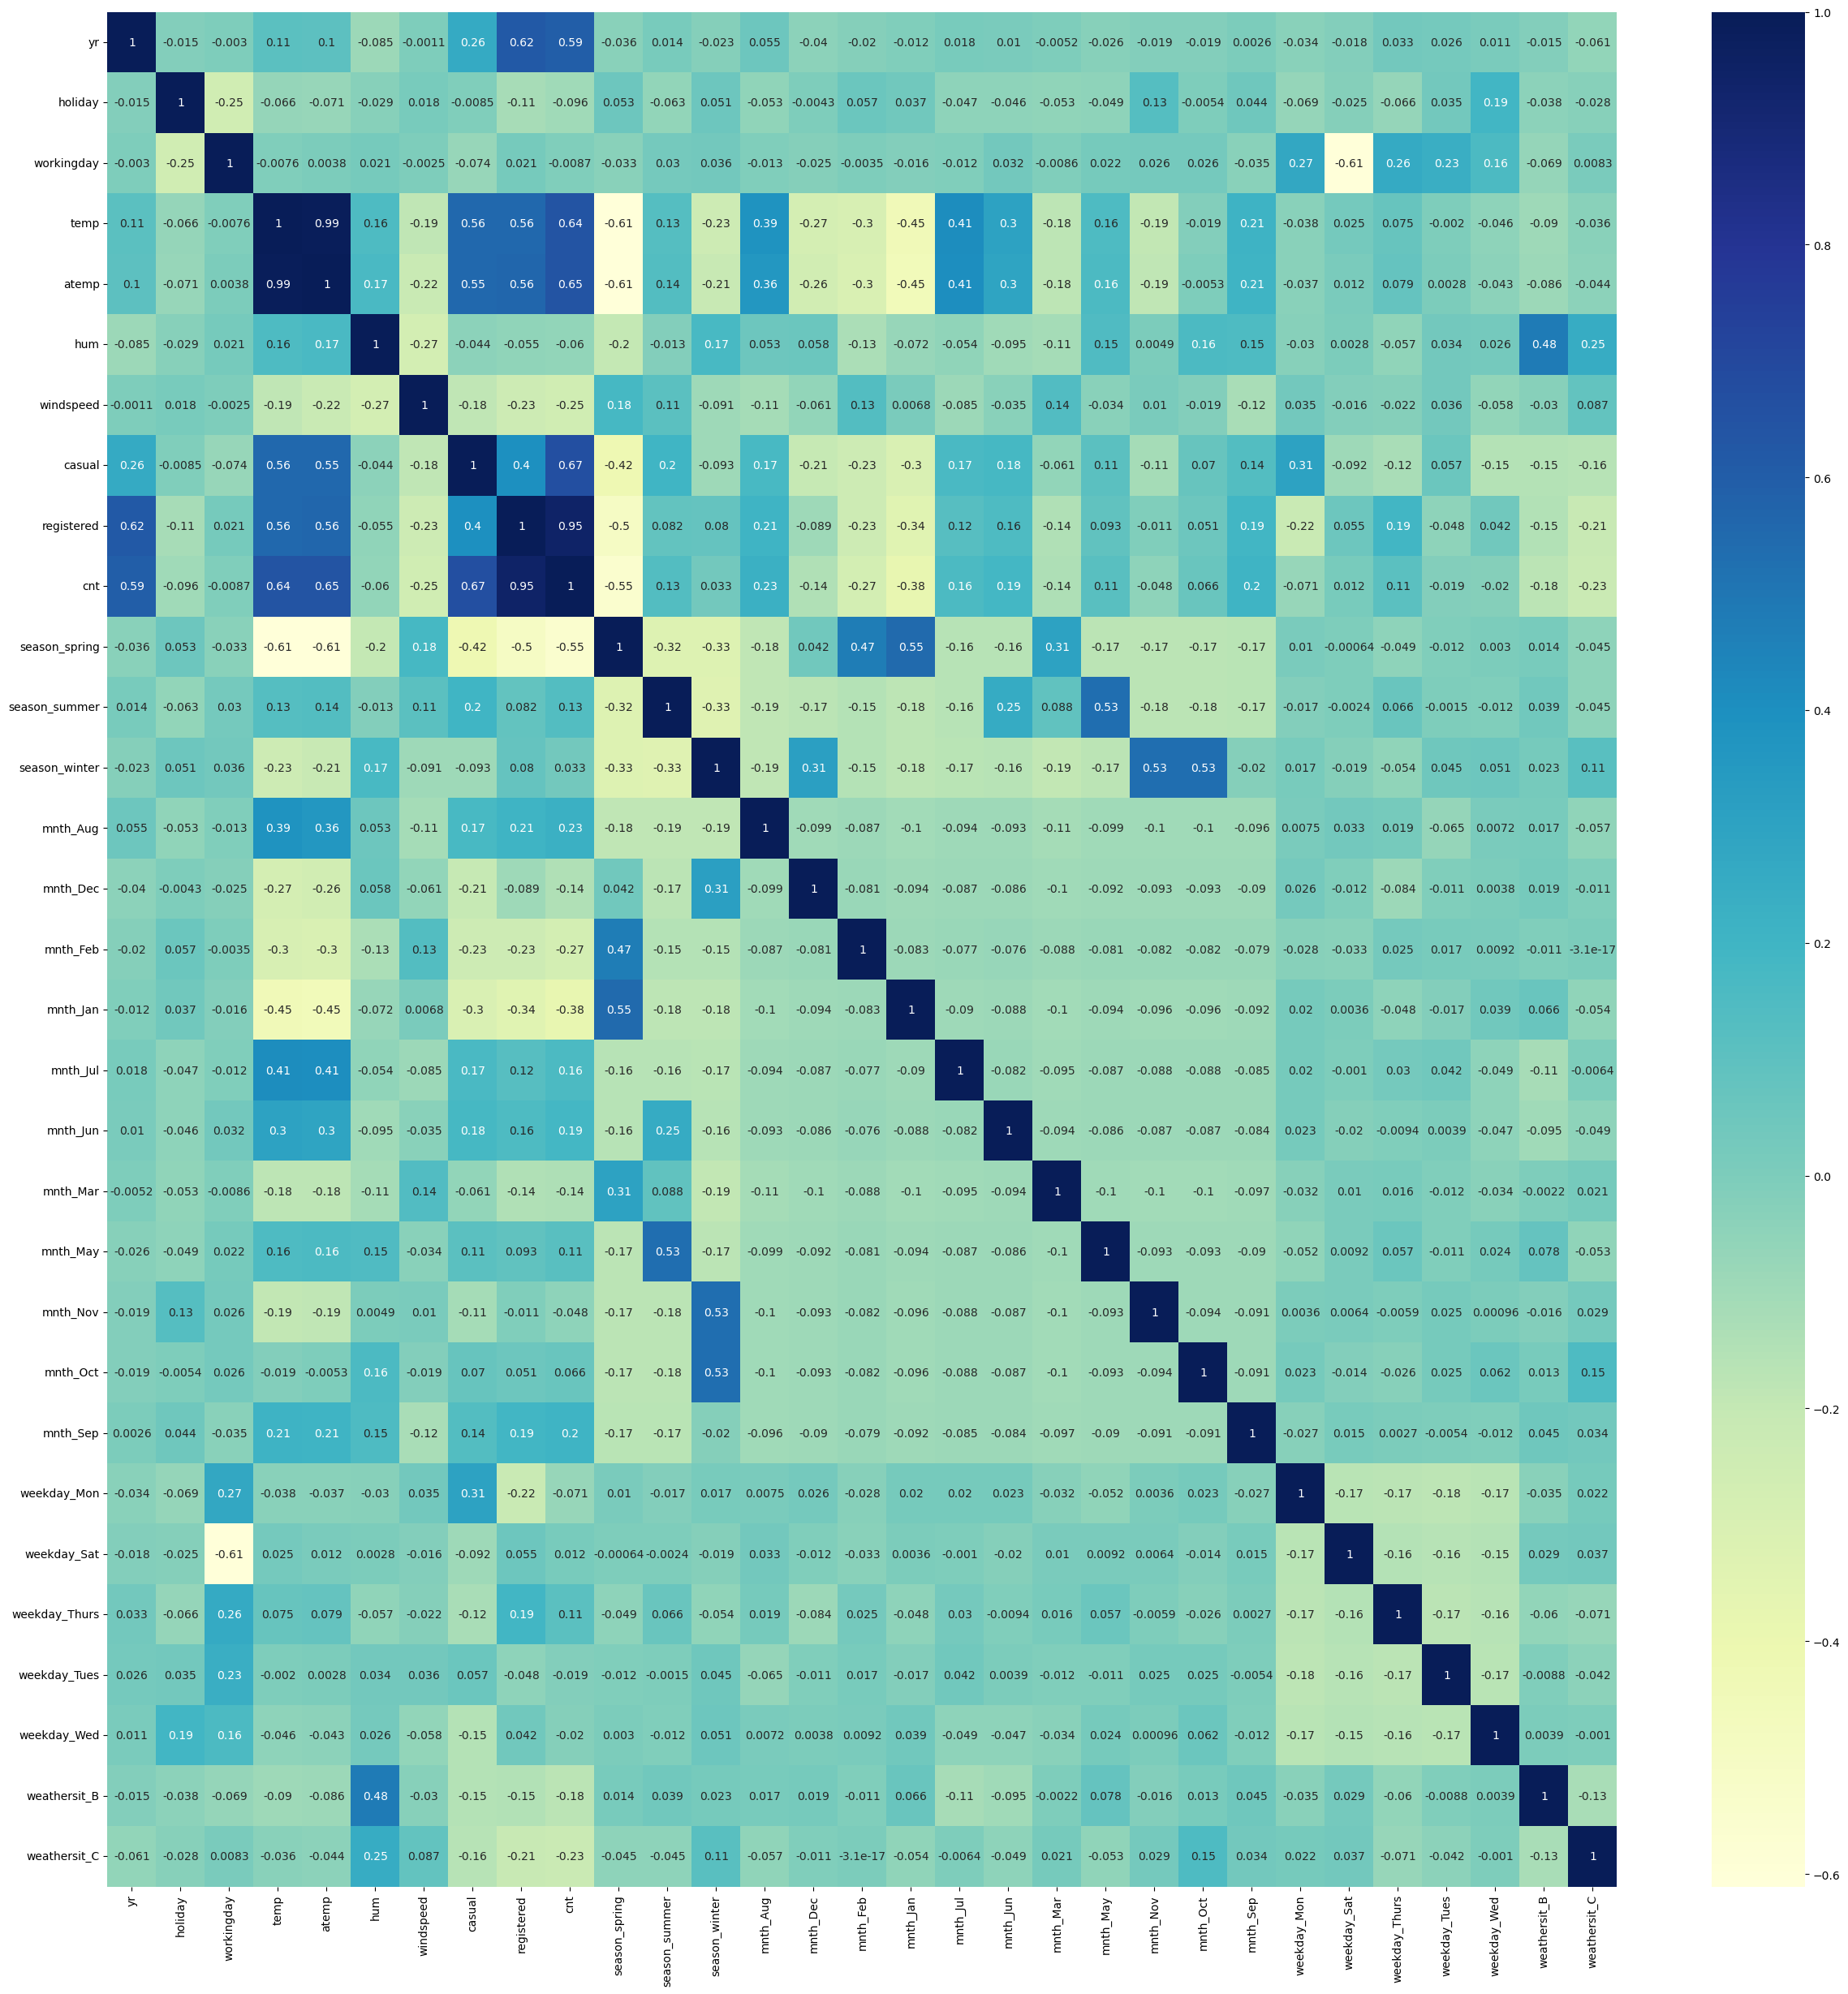

In [124]:
plt.figure(figsize = (30,30))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [125]:
# dividing into x and y
y_train = df_train.pop('cnt')
x_train = df_train.drop(["casual", "registered"], axis=1)

In [126]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,23.0423,0.575354,0.300794,0,0,1,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,33.1448,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,20.6746,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,11.5850,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,18.8752,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [127]:
np.array(x_train)

array([[1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [128]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_lm).fit()

In [129]:
lr.params

const            0.339133
yr               0.231234
holiday         -0.094134
workingday      -0.012013
temp             0.402990
atemp            0.001181
hum             -0.156759
windspeed       -0.181751
season_spring   -0.043808
season_summer    0.041838
season_winter    0.109821
mnth_Aug         0.022352
mnth_Dec        -0.045101
mnth_Feb        -0.036821
mnth_Jan        -0.063160
mnth_Jul        -0.034699
mnth_Jun         0.001647
mnth_Mar         0.000675
mnth_May         0.024219
mnth_Nov        -0.042351
mnth_Oct         0.006333
mnth_Sep         0.086697
weekday_Mon     -0.023648
weekday_Sat     -0.007116
weekday_Thurs    0.004825
weekday_Tues    -0.025047
weekday_Wed     -0.009509
weathersit_B    -0.059262
weathersit_C    -0.250592
dtype: float64

In [130]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [131]:
print(lm.coef_)
print(lm.intercept_)

[ 0.23123389 -0.09413418 -0.0120128   0.40298952  0.00118132 -0.15675873
 -0.1817509  -0.04380771  0.04183759  0.10982078  0.02235189 -0.04510106
 -0.03682069 -0.06315992 -0.03469897  0.00164685  0.00067539  0.02421864
 -0.04235123  0.00633316  0.08669685 -0.02364763 -0.00711629  0.00482495
 -0.0250473  -0.00950866 -0.05926212 -0.25059183]
0.33913324987672366


In [132]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.94
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          5.23e-179
Time:                        12:01:53   Log-Likelihood:                 523.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     481   BIC:                            -866.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3391      0.047      7.217      0.000       0.247       0.431
yr                0.2312      0.008     28.450      0.000       0.215       0.247
holiday          -0.0941      0.029     -3.214      0.001      -0.152      -0.037
workingday       -0.0120      0.015     -0.805      0.421      -0.041       0.017
temp              0.4030      0.143      2.811      0.005       0.121       0.685
atemp             0.0012      0.004      0.323      0.747      -0.006       0.008
hum              -0.1568      0.039     -4.033      0.000      -0.233      -0.080
windspeed        -0.1818      0.027     -6.824      0.000      -0.234      -0.129
season_spring    -0.0438      0.030     -1.446      0.149      -0.103       0.016
season_summer     0.0418      0.026      1.579      0.115      -0.010       0.094
season_winter     0.1098      0.028      3.896      0.000       0.054       0.165
mnth_Aug          0.0224      0.034      0.651      0.515      -0.045       0.090
mnth_Dec         -0.0451      0.034     -1.331      0.184      -0.112       0.021
mnth_Feb         -0.0368      0.033     -1.107      0.269      -0.102       0.029
mnth_Jan         -0.0632      0.034     -1.866      0.063      -0.130       0.003
mnth_Jul         -0.0347      0.036     -0.976      0.330      -0.105       0.035
mnth_Jun          0.0016      0.026      0.064      0.949      -0.049       0.052
mnth_Mar          0.0007      0.025      0.027      0.978      -0.048       0.049
mnth_May          0.0242      0.021      1.136      0.256      -0.018       0.066
mnth_Nov         -0.0424      0.037     -1.155      0.249      -0.114       0.030
mnth_Oct          0.0063      0.036      0.175      0.861      -0.065       0.077
mnth_Sep          0.0867      0.032      2.681      0.008       0.023       0.150
weekday_Mon      -0.0236      0.015     -1.630      0.104      -0.052       0.005
weekday_Sat      -0.0071      0.015     -0.463      0.643      -0.037       0.023
weekday_Thurs     0.0048      0.015      0.324      0.746      -0.024       0.034
weekday_Tues     -0.0250      0.015     -1.720      0.086      -0.054       0.004
weekday_Wed      -0.0095      0.015     -0.631      0.529      -0.039       0.020
weathersit_B     -0.0593      0.011     -5.625      0.000      -0.080      -0.039
weathersit_C     -0.2506      0.027     -9.396      0.000      -0.303      -0.198
==============================================================================
Omnibus:                       79.379   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.184
Skew:                          -0.778   Prob(JB):                     1.02e-45
Kurtosis:                       5.708   Cond. No.                         912.
================================================================

In [133]:
# import rfe
from sklearn.feature_selection import RFE

In [134]:
lm = LinearRegression()

rfe1 = RFE(lm, n_features_to_select=15)

# fit with 15 features
rfe1.fit(x_train, y_train)

print(rfe1.support_)
print(rfe1.ranking_)

[ True  True False  True False  True  True  True  True  True False  True
 False  True  True False False False  True False  True False False False
 False False  True  True]
[ 1  1  8  1 13  1  1  1  1  1  6  1  2  1  1 12 14  5  1 10  1  4  9 11
  3  7  1  1]


In [135]:
col1 = x_train.columns[rfe1.support_]
print(col1)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_B', 'weathersit_C'],
      dtype='object')


In [136]:
x_train_rfe1 = x_train[col1]
x_train_rfe1 = sm.add_constant(x_train_rfe1)
lm1 = sm.OLS(y_train, x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          3.34e-189
Time:                        12:01:54   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886      0.000       0.249       0.391
yr                0.2303      0.008     28.511      0.000       0.214       0.246
holiday          -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp              0.4800      0.037     12.977      0.000       0.407       0.553
hum              -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed        -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring    -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer     0.0408      0.015      2.659      0.008       0.011       0.071
season_winter     0.1034      0.018      5.763      0.000       0.068       0.139
mnth_Dec         -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan         -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_Jul         -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov         -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sep          0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_B     -0.0559      0.010     -5.338      0.000      -0.076      -0.035
weathersit_C     -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
a = x_train_rfe1.drop('const', axis=1)

In [139]:
# evaluating VIFs
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)

In [140]:
vif

,features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
13,weathersit_B,2.32
0,yr,2.09
11,mnth_Nov,1.83
9,mnth_Jan,1.75


In [141]:
lm = LinearRegression()

rfe2 = RFE(lm, n_features_to_select=7)

# fit with 7 features
rfe2.fit(x_train, y_train)

print(rfe2.support_)
print(rfe2.ranking_)

[ True False False  True False  True  True  True False False False False
 False False  True False False False False False False False False False
 False False False  True]
[ 1  2 16  1 21  1  1  1  6  3 14  9 10  7  1 20 22 13  8 18  4 12 17 19
 11 15  5  1]


In [142]:
col2 = x_train.columns[rfe2.support_]
print(col2)

Index(['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'mnth_Jul',
       'weathersit_C'],
      dtype='object')


In [143]:
x_train_rfe2 = x_train[col2]
x_train_rfe2 = sm.add_constant(x_train_rfe2)
lm1 = sm.OLS(y_train, x_train_rfe2).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          2.34e-178
Time:                        12:01:54   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348      0.000       0.369       0.486
yr                0.2301      0.009     26.240      0.000       0.213       0.247
temp              0.4480      0.027     16.720      0.000       0.395       0.501
hum              -0.2412      0.033     -7.324      0.000      -0.306      -0.176
windspeed        -0.2066      0.027     -7.591      0.000      -0.260      -0.153
season_spring    -0.1487      0.013    -11.498      0.000      -0.174      -0.123
mnth_Jul         -0.0901      0.018     -4.945      0.000      -0.126      -0.054
weathersit_C     -0.1867      0.027     -6.933      0.000      -0.240      -0.134
==============================================================================
Omnibus:                       45.817   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.848
Skew:                          -0.547   Prob(JB):                     8.40e-20
Kurtosis:                       4.714   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
b = x_train_rfe2.drop('const', axis=1)

# evaluating VIFs
vif2 = pd.DataFrame()
vif2['features'] = b.columns
vif2['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif2['VIF'] = round(vif['VIF'], 2)
vif2 = vif2.sort_values(by = 'VIF', ascending = False)

vif2

,features,VIF
3,windspeed,30.94
2,hum,17.80
4,season_spring,4.72
5,mnth_Jul,4.37
6,weathersit_C,2.81
0,yr,2.09
1,temp,1.06


In [145]:
y_train_cnt = lm1.predict(x_train_rfe2)

<AxesSubplot:ylabel='Density'>

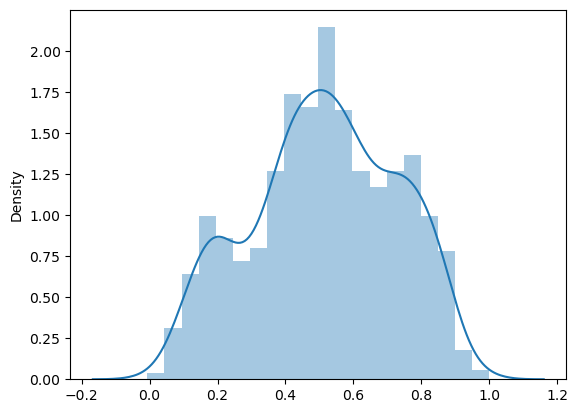

In [146]:
fig = plt.figure()
sns.distplot((y_train,y_train_cnt), bins = 20)

In [147]:
df_test[var] = scaler.transform(df_test[var])

In [148]:
y_test = df_test.pop('cnt')
x_test = df_test.drop(['casual', 'registered'], axis=1)

In [149]:
x_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,33.27085,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,36.04875,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,22.85230,0.837699,0.334206,0,0,1,...,0,1,0,0,1,0,0,0,1,0
221,0,0,1,0.881625,34.24915,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,32.19710,0.314298,0.537414,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [150]:
c = x_train_rfe2.drop('const', axis=1)

In [151]:
col2 = c.columns

In [152]:
x_test_rfe2 = x_test[col2]

In [153]:
x_test_rfe2 = sm.add_constant(x_test_rfe2)

In [154]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   hum            219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    uint8  
 6   mnth_Jul       219 non-null    uint8  
 7   weathersit_C   219 non-null    uint8  
dtypes: float64(4), int64(1), uint8(3)
memory usage: 10.9 KB


In [155]:
y_pred = lm1.predict(x_test_rfe2)

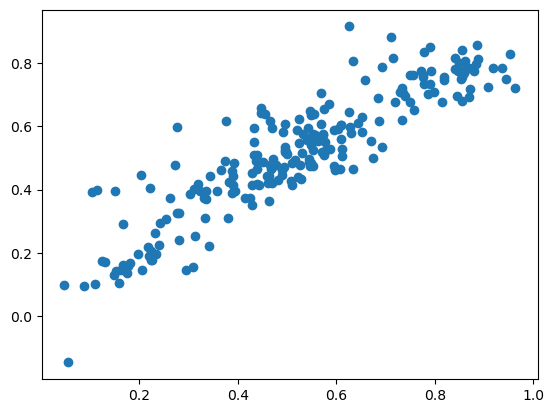

In [156]:
plt.figure()
plt.scatter(y_test,y_pred)

In [157]:
from sklearn.metrics import r2_score

In [158]:
r2_score(y_test, y_pred)

0.805237966729836

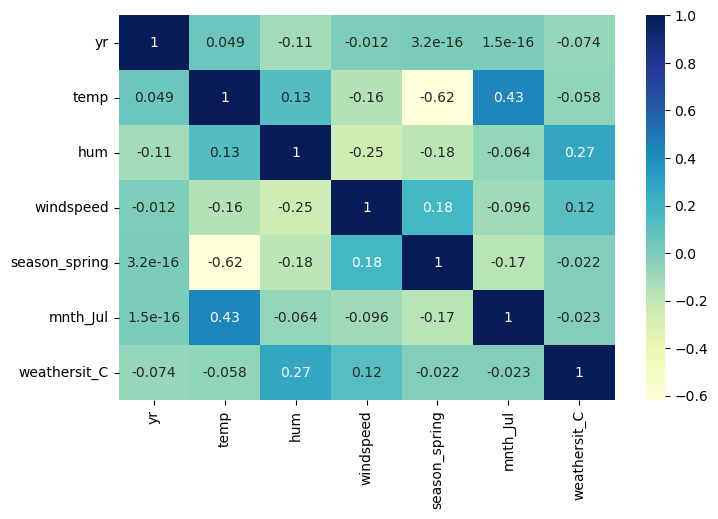

In [159]:
plt.figure(figsize = (8,5))
sns.heatmap(dataset[col2].corr(), cmap = "YlGnBu", annot = True)
plt.show()